In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
dat=pd.read_csv('Iris.csv')
dat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
dat.drop('Id',axis=1,inplace=True)

In [25]:
dat.shape

(150, 5)

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dat.select_dtypes('float')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
dat.select_dtypes('object')

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [39]:
dat['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
dat.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

dat['Species']=le.fit_transform(dat['Species'])
dat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
dat['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [113]:
le.classes_

array([0, 1, 2])

In [15]:
X=dat.iloc[:,:-1]

Y=dat.iloc[:,-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [53]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

x1,x2,y1,y2=train_test_split(X,Y, train_size=0.2,random_state=2)

In [17]:
x1,x2,y1,y2=train_test_split(X,Y, train_size=0.2,random_state=2)

In [61]:
x2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
12,4.8,3.0,1.4,0.1
24,4.8,3.4,1.9,0.2


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
lr_model=LogisticRegression()
lr_model.fit(x1,y1)

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
yp=lr_model.predict(x2)
yp[5:18]

array([2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [79]:
y2[2:15]

113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
48     0
42     0
35     0
5      0
85     1
Name: Species, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y2,yp)*100

99.16666666666667

In [125]:
accuracy_score(yp,y1)*100

100.0

In [25]:
confusion_matrix(y2,yp)


array([[39,  0,  0],
       [ 0, 38,  1],
       [ 0,  0, 42]], dtype=int64)

<Axes: >

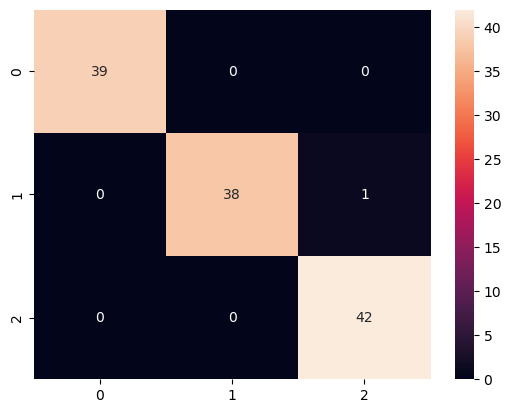

In [27]:
cm=confusion_matrix(y2,yp)
sns.heatmap(cm,annot=True)

<Axes: >

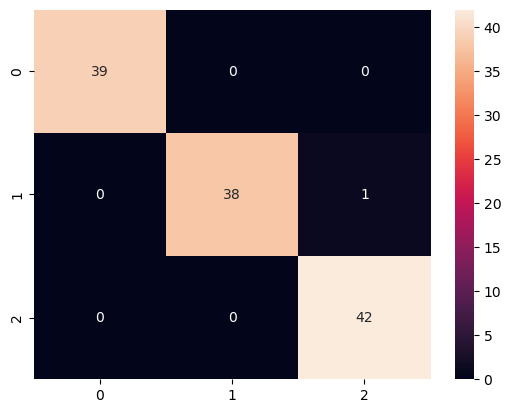

In [29]:
cm=confusion_matrix(y2,yp)
sns.heatmap(cm,annot=True)

In [37]:
svm_model=SVC()
svm_model.fit(x1,y1)

SVC()

In [35]:
accuracy_score(y1,yp)*100
yp[5:18]

array([1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2])

In [41]:
accuracy_score(y1,yp)*100

96.66666666666667

In [45]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x1,y1)
yp=dt_model.predict(x1)
yp[5:18]

array([1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2])

In [47]:
accuracy_score(y1,yp)*100

100.0

In [51]:
knn_model=KNeighborsClassifier()
knn_model.fit(x1,y1)
yp=knn_model=knn_model.predict(x1)
accuracy_score(y1,yp)*100


93.33333333333333

In [55]:
import pickle as pkl
fileNAME='saved_model.sav'
pkl.dump(svm_model,open(fileNAME,'wb'))